#Clustering Menggunakan Algoritma K-Medoids (dengan Parameter Default)

Dataset: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

Setelah ditentukan fitur-fitur yang akan digunakan sesuai dengan hasil visualisasi di Colab0: https://colab.research.google.com/drive/12xwqqv7F0ZF7hytN2U5kmlGr0_lHeOhG?ouid=106950143032811372632&usp=drive_link

Maka, dibuatlah clustering dengan menggunakan algoritma K-Medoids yang bertujuan untuk memahami karakter customer pada e-commerce XYZ.

Parameter algoritma yang digunakan yaitu parameter default (berdasarkan rangkuman parameter https://docs.google.com/spreadsheets/d/1SwdHlndnVU8mGfc1X6n9RxK3bcWqKYSO6sVfMsIndkU/edit?usp=sharing ) yaitu Skema 1.


Fitur yang dipakai adalah 3 fitur yang paling berkolerasi satu sama lain yaitu:

1. OrderCount
2. CouponUsed
3. HourSpendOnApp


In [1]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [4]:
#Data Loading

import pandas as pd

url = "https://github.com/ranidsr/projekmsib/raw/main/E%20Commerce%20Dataset.xlsx"
df = pd.read_excel(url, sheet_name='E Comm')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [5]:
#Update Dataframe berdasarkan fitur yang digunakan saja

df=df[['OrderCount', 'CouponUsed', 'HourSpendOnApp']]
df

,OrderCount,CouponUsed,HourSpendOnApp
0,1.0,1.0,3.0
1,1.0,0.0,3.0
2,1.0,0.0,2.0
3,1.0,0.0,2.0
4,1.0,1.0,NaN
...,...,...,...
5625,2.0,1.0,3.0
5626,2.0,1.0,3.0
5627,2.0,1.0,3.0
5628,2.0,2.0,4.0


In [6]:
#Lihat rangkuman data apakah ada missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderCount      5372 non-null   float64
 1   CouponUsed      5374 non-null   float64
 2   HourSpendOnApp  5375 non-null   float64
dtypes: float64(3)
memory usage: 132.1 KB


In [7]:
#Handling Missing Values
import numpy as np

df.dropna(axis=0, how='any', subset=(['OrderCount', 'CouponUsed', 'HourSpendOnApp']), inplace=True)
df.reset_index()
df = pd.concat([df], ignore_index=True)

<ipython-input-7-cef5e865a2ed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, how='any', subset=(['OrderCount', 'CouponUsed', 'HourSpendOnApp']), inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4861 entries, 0 to 4860
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderCount      4861 non-null   float64
 1   CouponUsed      4861 non-null   float64
 2   HourSpendOnApp  4861 non-null   float64
dtypes: float64(3)
memory usage: 114.1 KB


<Axes: >

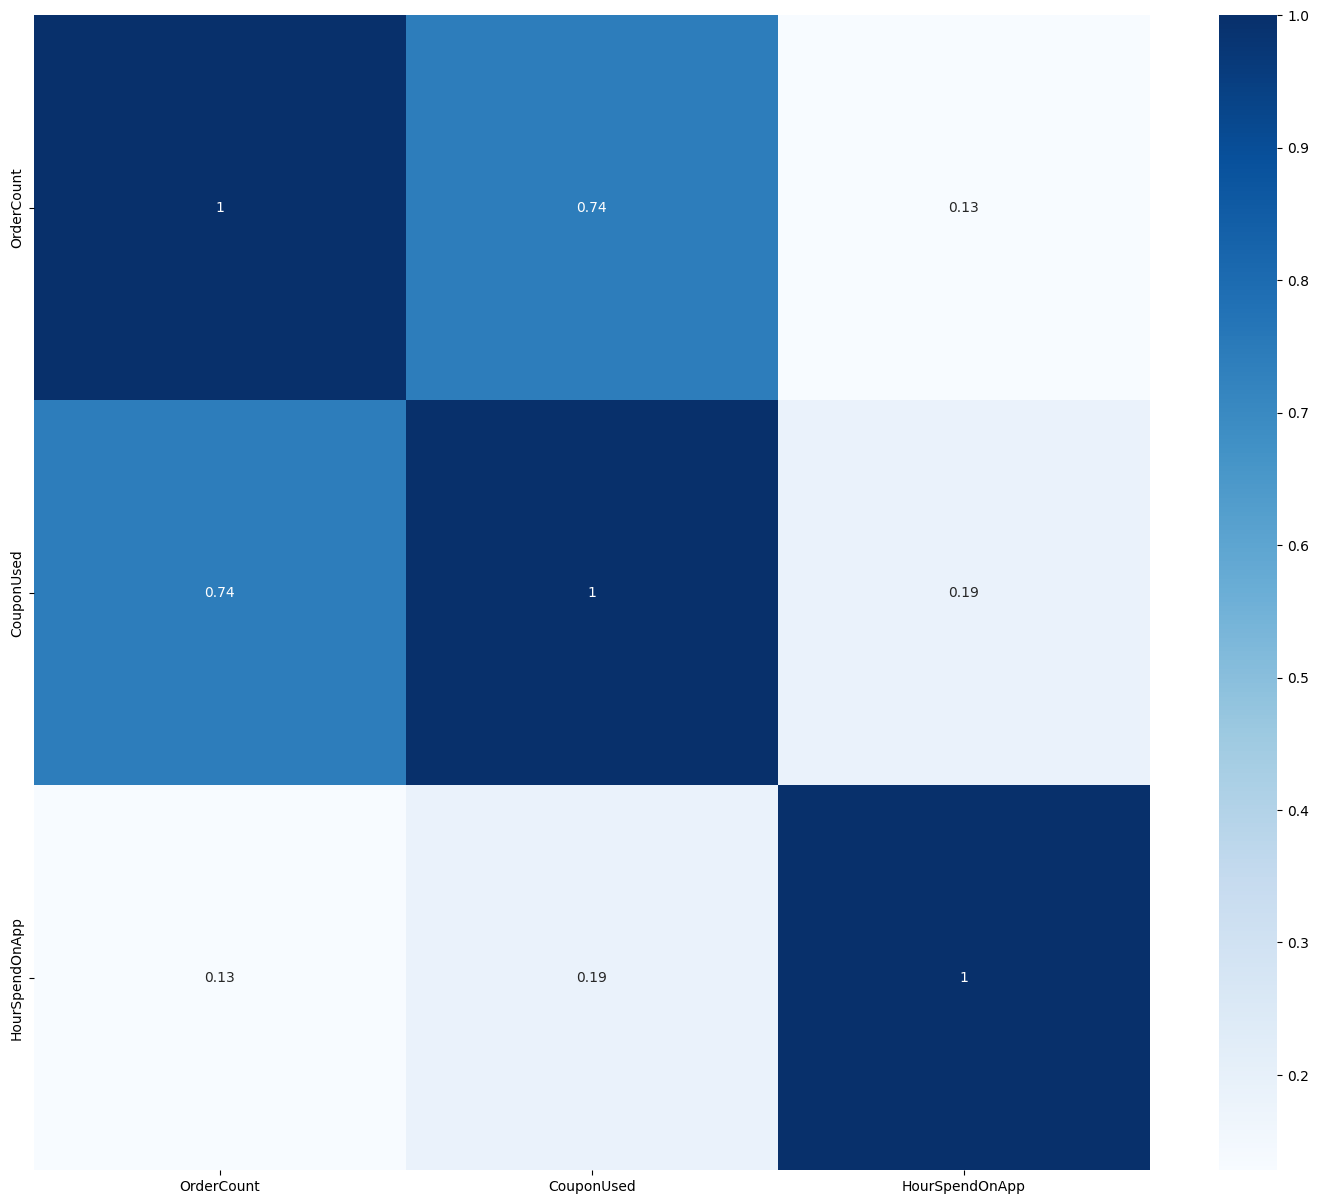

In [9]:
import seaborn as sns

plt.figure(figsize = (18,15))
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

In [10]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler

In [11]:
X, _ = make_blobs(random_state=42)
X = StandardScaler().fit_transform(X)
X

array([[-1.25730111e+00, -1.52486616e+00],
       [ 1.49987157e+00, -1.13176845e-01],
       [-2.64088262e-01,  1.24865264e+00],
       [ 1.62314632e+00, -1.39593967e-01],
       [-1.00530686e+00, -1.20418507e+00],
       [ 1.12246973e+00, -1.05025949e-02],
       [-9.65766460e-02,  1.31554799e+00],
       [ 1.28373194e+00,  1.32162508e-01],
       [ 1.34999484e+00,  2.26643082e-01],
       [-4.06659748e-01,  1.22287278e+00],
       [-2.79758830e-01,  1.18196549e+00],
       [-1.03257092e+00, -1.08887417e+00],
       [-9.70966366e-01, -1.24494164e+00],
       [-3.97317321e-01,  9.80016554e-01],
       [-1.13911386e-02,  1.19130423e+00],
       [-1.30418181e+00, -1.21628414e+00],
       [-1.02227199e+00, -1.16302698e+00],
       [-1.80940096e-01,  1.31987205e+00],
       [-1.26505471e+00, -1.26707496e+00],
       [-9.81155064e-01, -1.30207712e+00],
       [-2.62821222e-01,  1.09287382e+00],
       [-1.09628417e+00, -1.23811787e+00],
       [-1.17356416e+00, -1.15851324e+00],
       [-9.

In [12]:
#Skema 1 = Default

kmedoids = KMedoids()
kmedoids.fit(X)

KMedoids()

In [13]:
cluster_labels = kmedoids.labels_

In [14]:
silhouette_avg = silhouette_score(X, cluster_labels)

In [15]:
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.46372966465922355


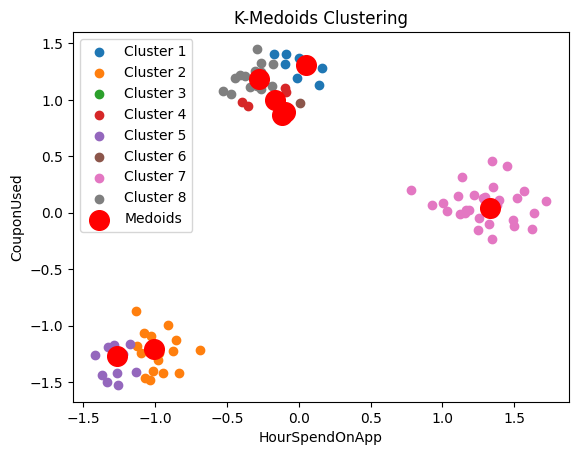

In [16]:
for i in range(8):
  plt.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1], label=f'Cluster {i+1}')

plt.scatter(kmedoids.cluster_centers_[:,0], kmedoids.cluster_centers_[:,1], s=200, c='red', label='Medoids')
plt.legend()
plt.title("K-Medoids Clustering")
plt.xlabel("HourSpendOnApp")
plt.ylabel("CouponUsed")
plt.show()